In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Dense,Flatten
from tensorflow.keras.utils import plot_model
from tensorflow.keras import initializers
sns.set_theme(style="darkgrid")



In [ ]:
O = []
X = []
y_x =np.array([ [] ])
y_o = np.array([ [] ])



In [ ]:
#for test set
def create_2d_data_test(Ulx,Uhx,Uly,Uhy):
  return  [[random.randint(Ulx,Uhx),random.randint(Uly,Uhy)] for p in range(0,150)]

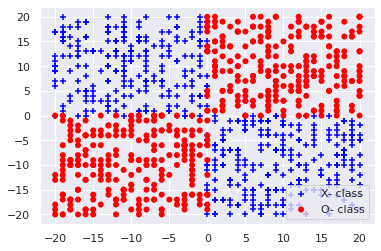

In [ ]:
#set up number of training samples
N = 250
Uh = 20
Ul = 0

#set up O- class (1st third quadrant)

def create_2d_data(Ulx,Uhx,Uly,Uhy):
  return  [[random.randint(Ulx,Uhx),random.randint(Uly,Uhy)] for p in range(0,250)]


O =np.array(create_2d_data(0,20,0,20) + create_2d_data(-20,0,-20,0))

X =np.array(create_2d_data(0,20,-20,0) + create_2d_data(-20,0,0,20))

#plot
plt.scatter(X[:,0], X[:,1], marker = '+', c ='blue', label = 'X- class')
plt.scatter(O[:,0], O[:,1], marker = 'o', c ='red', edgecolors = 'none', label = 'O- class')
plt.legend()
plt.grid(True)

# print(X[0],X[0][0])
# print(X[:,0])



In [ ]:
X.shape

(500, 2)

In [ ]:
O.shape

(500, 2)

In [ ]:
#set up the training samples from X class and O class
X_train = np.concatenate((X, O), axis=0)
X_train = tf.cast( tf.constant(X_train), dtype = tf.float32 )

y_x = tf.constant([np.append(y_x,[1, 0]) for p in range(0,500)])
y_o = tf.constant([np.append(y_o,[0, 1]) for p in range(0,500)])

# for i in range (0,250):
#   print(np.append(y_x,[1]))
#   print(np.append(y_o,[0]))


y_train = np.concatenate((y_x, y_o), axis=0)
y_train = tf.cast(tf.constant(y_train), dtype = tf.float32)


In [ ]:
y_x.shape

TensorShape([500, 2])

In [ ]:
X_train.shape

TensorShape([1000, 2])

In [ ]:
#global random seed
tf.random.set_seed(42)

# tf.keras.layers.Conv2D(
#     filters, kernel_size, strides=(1, 1), padding='valid', data_format=None,
#     dilation_rate=(1, 1), groups=1, activation=None, use_bias=True,
#     kernel_initializer='glorot_uniform', bias_initializer='zeros',
#     kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None,
#     kernel_constraint=None, bias_constraint=None, **kwargs
# 



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 8)                 24        
                                                                 
 dense_15 (Dense)            (None, 2)                 18        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


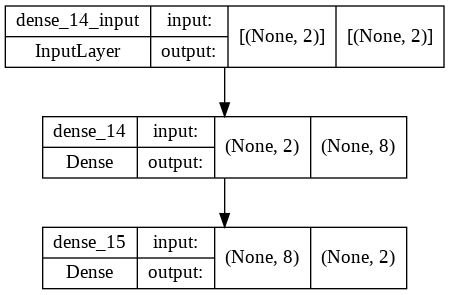

In [ ]:
#Model setup 
initializer = tf.keras.initializers.GlorotNormal()
model = tf.keras.Sequential([
        tf.keras.layers.Dense(8, 
                              activation="relu",
                              kernel_initializer=initializer, 
                              bias_initializer=tf.keras.initializers.Zeros(),
                              input_shape =(2,) ),
        tf.keras.layers.Dense(2,
                              activation="sigmoid",
                              kernel_initializer=initializer,
                              bias_initializer=initializers.Zeros()),
                             
        # tf.keras.layers.Dense(8,   kernel_initializer=initializer, bias_initializer=tf.keras.initializers.Zeros(),input_shape =(2,) ),
      
    ]
    
)

model.build()
model.summary()
plot_model(model=model, show_shapes = True)



In [ ]:
for x in model.layers:
  print("weights",x.weights)

weights [<tf.Variable 'dense_14/kernel:0' shape=(2, 8) dtype=float32, numpy=
array([[-0.9579847 ,  1.2114791 , -1.2919546 , -1.2236059 ,  0.53078836,
        -1.1355228 ,  1.4641495 , -0.08696084],
       [-1.0678058 , -1.336548  ,  0.853589  , -1.2234154 , -0.60845274,
         0.7747219 ,  1.0483764 , -0.14571208]], dtype=float32)>, <tf.Variable 'dense_14/bias:0' shape=(8,) dtype=float32, numpy=
array([-0.70766264, -0.16654289, -0.35082048, -0.84433675, -0.68245476,
       -0.40381354, -2.208761  , -1.5141361 ], dtype=float32)>]
weights [<tf.Variable 'dense_15/kernel:0' shape=(8, 2) dtype=float32, numpy=
array([[-0.65295005,  1.0308311 ],
       [ 1.286252  , -1.235003  ],
       [ 1.041164  , -0.3494108 ],
       [-1.1697792 ,  0.8372989 ],
       [ 0.56630725, -0.65079814],
       [ 0.5261461 , -1.2733432 ],
       [-1.2789732 ,  1.2709377 ],
       [-0.17897815, -0.07722335]], dtype=float32)>, <tf.Variable 'dense_15/bias:0' shape=(2,) dtype=float32, numpy=array([-1.1448427,  1.040

In [ ]:
X_train.shape

TensorShape([1000, 2])

In [ ]:

X_train.dtype, y_train.dtype, X_train.ndim, y_train.ndim

(tf.float32, tf.float32, 2, 2)

In [ ]:
#compile
# m = tf.keras.metrics.Accuracy()
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=False) ,
              optimizer = tf.keras.optimizers.Adam(lr=.1),
              metrics =tf.keras.metrics.BinaryAccuracy())
#fit model
model.fit ( X_train, y_train,batch_size = 250, epochs = 100, verbose = 1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


4/4 [==============================] - 1s 5ms/step - loss: 2.2636 - binary_accuracy: 0.5235
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6354 - binary_accuracy: 0.6445
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5973 - binary_accuracy: 0.6785
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.4240 - binary_accuracy: 0.7905
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 0.3623 - binary_accuracy: 0.8720
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.2816 - binary_accuracy: 0.8830
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 0.2222 - binary_accuracy: 0.9020
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 0.1858 - binary_accuracy: 0.9160
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.1618 - binary_accuracy: 0.9230
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 0.14

In [ ]:
#model evaluation

x_test = []
y_test = [[]]

x_text_x = []
x_test_o = []

y_x =np.array([ [] ])
y_o = np.array([ [] ])

x_test_x = np.array(create_2d_data_test(0,20,-20,0))
x_test_o = np.array(create_2d_data_test(-20,0,-20,0))

x_test = np.concatenate( (x_test_x , x_test_o) , axis =0 )

y_x = [np.append(y_x,[1, 0]) for p in range(0,150)]
y_o = [np.append(y_o,[0, 1]) for p in range(0,150)]

y_test = np.concatenate( (y_x , y_o), axis = 0 )

score = model.evaluate(x_test,y_test,verbose=0)
print("Accuracy is ",score[1])



Accuracy is  0.9733333587646484


In [ ]:
A = x_test
B = y_test
A_df = pd.DataFrame(A,columns=['x1','x2'])
A_df.head()

,x1,x2
0,13,-16
1,10,-12
2,4,-15
3,17,-16
4,5,-17


In [ ]:
# B_df = pd.DataFrame(B,columns=["co-rdinate1", "co-rdinate2"])
B_df = pd.DataFrame(B,columns=["co-rdinate1", "co-rdinate2"])
B_df.head()

,co-rdinate1,co-rdinate2
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [ ]:
frames = [A_df, B_df]
data = pd.concat(frames,axis=1)
data.head()

,x1,x2,co-rdinate1,co-rdinate2
0,13,-16,1.0,0.0
1,10,-12,1.0,0.0
2,4,-15,1.0,0.0
3,17,-16,1.0,0.0
4,5,-17,1.0,0.0


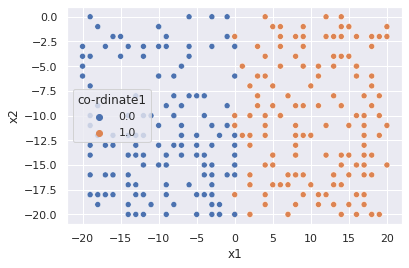

In [ ]:
# create scatter plot for samples from each class
sns.scatterplot(x="x1", y="x2", hue="co-rdinate1", data=data)

In [ ]:
#  def plot(X_data, X_labels, h=0.01):
#         """
#         Generate plot of input data and decision boundary.
#         """
#         # setting plot properties like size, theme and axis limits
#         sns.set_style('darkgrid')
#         plt.figure(figsize=(10, 10))

#         plt.axis('scaled')
#         plt.xlim(-20, 20)
#         plt.ylim(-20, 20)

#         colors = {
#             0: "ro",
#             1: "go"
#         }

#         # plotting the four datapoints
#         for i in range(len(X_data)):
#             plt.plot([X_data[i][0]],
#                      [X_data[i][1]],
#                      colors[X_labels[i][0]],
#                      markersize=20)

#         x_range = np.arange(-20, 20, h)
#         y_range = np.arange(-20, 20, h)

#         # creating a mesh to plot decision boundary
#         xx, yy = np.meshgrid(x_range, y_range, indexing='ij')
#         Z = np.array([[model([x, y]) for x in x_range] for y in y_range])

#         # using the contourf function to create the plot
#         plt.contourf(xx, yy, Z, colors=['red', 'green', 'green', 'blue'], alpha=0.4)
#         plt.contourf(xx, yy, Z, colors=['red', 'green', 'green', 'blue'], alpha=0.4)








In [ ]:
# plot(x_test, y_test, h=0.01)

In [ ]:
x_test.shape, y_test.shape

((300, 2), (300, 2))

In [ ]:
def boundary(model, x_test, y_test):
  x_test = np.array(x_test)
  y_test = np.array(y_test)

  numberOFclasses = 2

  # MeshGrid
  x_min, x_max = x_test[:, 0].min() - 0.1, x_test[:, 0].max() + 0.1

  y_min, y_max = x_test[:, 1].min() - 0.1, x_test[:, 1].max() + 0.1

  x_mesh, y_mesh = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
  
  x_merged = np.c_[x_mesh.ravel(), y_mesh.ravel()]

  y_prediction = model.predict(x_merged)

  y_result = model.predict(x_test)

  #multiple classes
  # min = a if a < b else b
  if len(y_result[1])>1:
    y_prediction = np.argmax(y_prediction, axis=1)
    y_result = np.array([np.argmax(y_test) for y_result in y_result])
    yy = np.array([np.argmax(y_test) for y_test in y_test])

  else:
     y_prediction = np.round(y_prediction)
     y_result = np.round(y_result)
     yy = y_test

  #finetuning y_result to plot it

  y_result_contour = np.array([1-y_test for y_test in y_prediction]).reshape(x_mesh.shape)   


  y_contour = np.array([1-i for i in  y_prediction]).reshape(x_mesh.shape)

  #misclassified data
  misinterpret = np.argwhere(y_result!=yy).flatten()
  wrong_x = np.array([ x_test[i] for i in misinterpret ])
  wrong_y = np.array([ np.argmax(y_test[j])for j in misinterpret])

  #Decision_graph_plot
  plt.contour(x_mesh,y_mesh, y_result_contour, cmap=plt.cm.RdYlBu, alpha=.7)

  #misclassification plotting

  plt.scatter(wrong_x[:,0],wrong_x[:,1], c= wrong_y, s = 40, cmap = plt.cm.RdYlBu)
  plt.xlim(x_mesh.min(),x_mesh.max() )
  plt.ylim(y_mesh.min(),y_mesh.max() )





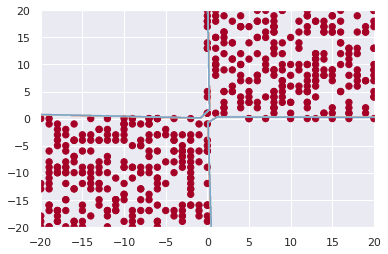

In [ ]:
boundary(model, X_train, y_train)

In [ ]:
X_train.shape

TensorShape([1000, 2])

In [ ]:
y_train.shape

TensorShape([1000, 2])

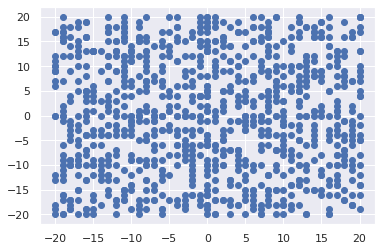

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1])

In [ ]:
def get_random_1d(minv,maxv,number):
  return tf.random.uniform([number], minval=minv, maxval=maxv, dtype=tf.dtypes.float32, seed=42, name=None)

def get_2D_random(minx, maxx, miny, maxy, number):
  number = int(number)
  xes= get_random_1d(minx, maxx, number)
  yes= get_random_1d(miny, maxy, number)
  d2d=tf.transpose([xes,yes])
  return d2d

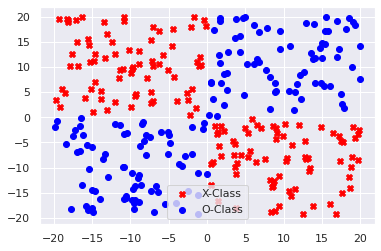

In [ ]:
def create_XOR_data(N,Uh,Ul):
  quad=int(N/4)
  half=int(N/2)
  #Setop the O-Class (first and third quadrant)
  o1=get_2D_random(Ul, Uh,Ul, Uh, quad)
  o2=get_2D_random(-Uh, Ul,-Uh, Ul, quad)
  o=tf.concat([o1,o2],0)
  # o

  # #Setup the X-Class (second and third quadrant)
  x1=get_2D_random(Ul, Uh, -Uh, Ul, quad)
  x2=get_2D_random(-Uh, Ul, Ul, Uh, quad)
  x=tf.concat([x1,x2],0)
  # x
  X=tf.concat([x,o],0)
  # X

  y_x = tf.transpose([tf.zeros(half),tf.ones(half)])
  y_o = tf.transpose([tf.ones(half),tf.zeros(half)])
  y=tf.concat([y_x,y_o],0)
  # y

  plt.scatter(x[:,0],x[:,1],marker="X", c="red", label="X-Class")
  plt.scatter(o[:,0],o[:,1],marker="o", c="blue", label="O-Class")
  plt.legend()
  plt.grid(True)

  return X,y


X_test,y_test=create_XOR_data(300,20,0)

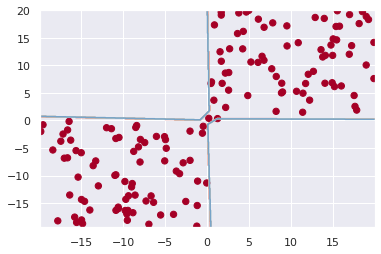

In [ ]:
boundary(model, X_test,y_test)

In [ ]:
def plot_decision_boundary_and_indicate_falses(model, X, y):
  X=np.array(X)
  y=np.array(y)
  no_of_class=y[0].shape[0]
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000),
                       np.linspace(y_min, y_max, 1000))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred_grid = model.predict(x_in)
  
  y_pred=model.predict(X)


  # Check for multi-class
  if len(y_pred[0]) > 1:
    # print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred_grid = np.argmax(y_pred_grid, axis=1)

    y_pred=np.array([np.argmax(y_pred) for y_pred in y_pred])
    y_t=np.array([np.argmax(y) for y in y])
  else:
    # print("doing binary classifcation...")
    y_pred_grid = np.round(y_pred_grid)

    y_pred=np.round(y_pred)
    y_t=y


  #Make y_pred suitable to be displayed
  y_pred_contour=np.array([1-y for y in y_pred_grid]).reshape(xx.shape)

  # Find the wrongly classified out of all the prediction
  where_false=np.argwhere(y_pred!=y_t).flatten() 
  X_false=np.array([X[a] for a in where_false])
  y_false=np.array([np.argmax(y[a]) for a in where_false])

  #Plot the decision boundry
  plt.contourf(xx, yy, y_pred_contour, cmap=plt.cm.RdYlBu, alpha=0.7)
  #Plot the wrongly classified data 
  plt.scatter(X_false[:, 0], X_false[:, 1], c=y_false, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

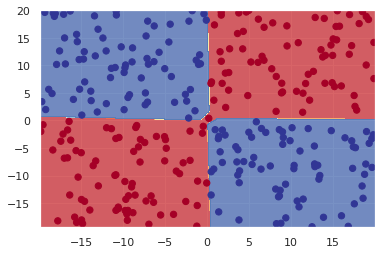

In [ ]:
plot_decision_boundary_and_indicate_falses(model,X_test,y_test)

In [ ]:
X_test.shape

TensorShape([300, 2])